_Lambda School Data Science_

# Scrape and process data

Objectives
- scrape and parse web pages
- use list comprehensions
- select rows and columns with pandas

Links
-  [Automate the Boring Stuff with Python, Chapter 11](https://automatetheboringstuff.com/chapter11/)
  - Requests
  - Beautiful Soup
- [Python List Comprehensions: Explained Visually](https://treyhunner.com/2015/12/python-list-comprehensions-now-in-color/)
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)
  - Subset Observations (Rows)
  - Subset Variables (Columns)
- Python Data Science Handbook
  - [Chapter 3.1](https://jakevdp.github.io/PythonDataScienceHandbook/03.01-introducing-pandas-objects.html), Introducing Pandas Objects
  - [Chapter 3.2](https://jakevdp.github.io/PythonDataScienceHandbook/03.02-data-indexing-and-selection.html), Data Indexing and Selection


## Scrape the titles of PyCon 2018 talks

In [0]:
url = 'https://us.pycon.org/2018/schedule/talks/list/'

## 5 ways to look at long titles

Let's define a long title as greater than 80 characters

### 1. For Loop

### 2. List Comprehension

### 3. Filter with named function

### 4. Filter with anonymous function

### 5. Pandas

pandas documentation: [Working with Text Data](https://pandas.pydata.org/pandas-docs/stable/text.html)

## Make new dataframe columns

pandas documentation: [apply](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.apply.html)

### title length

### long title

### first letter

### word count

Using [`textstat`](https://github.com/shivam5992/textstat)

In [2]:
!pip install textstat

## Rename column

`title length` --> `title character count`

pandas documentation: [rename](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.rename.html)

## Analyze the dataframe

### Describe

pandas documentation: [describe](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html)

### Sort values

pandas documentation: [sort_values](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html)

Five shortest titles, by character count

Titles sorted reverse alphabetically

### Get value counts

pandas documentation: [value_counts](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html)


Frequency counts of first letters

Percentage of talks with long titles

### Plot

pandas documentation: [Visualization](https://pandas.pydata.org/pandas-docs/stable/visualization.html)





Top 5 most frequent first letters

Histogram of title lengths, in characters

# Assignment

**Scrape** the talk descriptions. Hint: `soup.select('.presentation-description')`

**Make** new columns in the dataframe:
- description
- description character count
- description word count
- description grade level (use [this `textstat` function](https://github.com/shivam5992/textstat#the-flesch-kincaid-grade-level) to get the Flesh-Kincaid grade level)

**Describe** all the dataframe's columns. What's the average description word count? The minimum? The maximum?

**Answer** these questions:
- Which descriptions could fit in a tweet?
- What's the distribution of grade levels? Plot a histogram.



In [0]:
url = 'https://us.pycon.org/2018/schedule/talks/list/'

In [0]:
import bs4
import requests
import pandas as pd

In [0]:
result = requests.get(url)
soup = bs4.BeautifulSoup(result.text)

In [0]:
descriptions = [tag.text.strip() 
          for tag in soup.select('div.presentation-description')]

In [0]:
df = pd.DataFrame({'description': descriptions})


In [0]:
df['description length'] = df.description.apply(len)
        


In [0]:
df.loc[df['description length'] > 100, 'description length']
df

In [34]:
df.describe()

,description length,description word count,description character count,kincaid grade
count,95.000000,95.000000,95.000000,95.000000
mean,846.063158,134.578947,846.063158,18.117895
std,450.107713,70.019082,450.107713,15.835652
min,201.000000,35.000000,201.000000,3.700000
25%,550.000000,91.500000,550.000000,10.500000
50%,758.000000,119.000000,758.000000,13.800000
75%,978.000000,149.500000,978.000000,17.950000
max,2794.000000,436.000000,2794.000000,107.800000


In [17]:
! pip install textstat

In [0]:
import textstat

In [0]:
df['description word count'] = df.description.apply(textstat.lexicon_count)
df['description character count'] = df.description.str.len()
df['description character count']

In [0]:
df['kincaid grade'] = df.description.apply(textstat.flesch_kincaid_grade)

In [0]:
df['tweet length'] = df[df['description word count'] < 281]
df['tweet length']

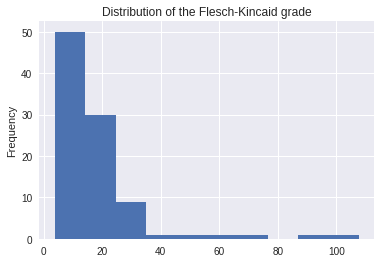

In [33]:
%matplotlib inline

title = 'Distribution of the Flesch-Kincaid grade'
df['kincaid grade'].plot.hist(title=title)